<a href="https://colab.research.google.com/github/renasyan/datmin-tubes-mlbb/blob/main/TUBES_DATMIN_MOBILE_LEGEND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA UNDERSTANDING

Sebelum memulai analisis data, kita perlu mengimpor beberapa library yang akan digunakan dalam.Data understanding adalah proses mengenal isi dan struktur data. Kami menganalisis data hero, hasil pertandingan, dan statistik untuk memahami pola awal yang relevan

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from itertools import combinations
from math import comb
from tqdm import tqdm

### 📌 pd.read_csv() untuk membaca file CSV dan mengubahnya menjadi DataFrame

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('results.csv')
df.head()

Saving results.csv to results.csv


,Unnamed: 0,file,player,ss_type,opening_failure,battle_id,match_result,match_duration,left_team_kills,right_team_kills,left_heroes,right_heroes,left_medals,right_medals,left_scores,right_scores
0,0,-Lexi/Screenshot_20230312-123242.jpg,-Lexi,Result,False,826832277614711985,Victory,27.583333,52,44,"['Melissa', 'Valir', 'Esmeralda', 'Lancelot', ...","['Franco', 'Chou', 'Cecilion', 'Aamon', 'Moskov']","['Silver', 'Gold', 'Silver', 'MVP Win', 'Gold']","['Silver', 'Bronze', 'Silver', 'MVP Lose', 'Go...","[6.7, 10.9, 7.4, 11.8, 10.0]","[8.3, 3.7, 8.6, 8.7, 8.6]"
1,1,-Lexi/Screenshot_20230312-123251.jpg,-Lexi,Result,False,826568042636726171,Defeat,15.383333,23,22,"['Xavier', 'Moskov', 'Helcurt', 'Masha', 'Esme...","['Carmilla', 'Lolita', 'Cecilion', 'Wanwan', '...","['Gold', 'Bronze', 'MVP Lose', 'Silver', 'Silv...","['Silver', 'Gold', 'MVP Win', 'Gold', 'Silver']","[7.6, 5.4, 9.6, 6.7, 6.9]","[5.8, 8.2, 8.9, 6.5, 5.6]"
2,2,-Lexi/Screenshot_20230312-123300.jpg,-Lexi,Result,False,190736668910472369,Defeat,16.883333,33,26,"['Balmond', 'Kadita', 'Esmeralda', 'Clint', 'E...","['Fredrinn', 'Lesley', 'Silvanna', 'Hylos', 'V...","['Silver', 'MVP Lose', 'Gold', 'Silver', 'Bron...","['MVP Win', 'Silver', 'Silver', 'Gold', 'Gold']","[7.9, 8.9, 8.3, 6.3, 5.4]","[9.2, 7.2, 5.7, 7.9, 7.8]"
3,3,-Lexi/Screenshot_20230312-123309.jpg,-Lexi,Result,False,822791349044299775,Victory,13.300000,33,16,"['Clint', 'Lunox', 'Esmeralda', 'Akai', 'Balmo...","['Yin', 'Dyrroth', 'Chou', 'Harith', 'Wanwan']","['MVP Win', 'Silver', 'Gold', 'Silver', 'Gold']","['MVP Lose', 'Silver', 'Silver', 'Silver', 'Br...","[10.2, 6.3, 8.7, 7.1, 8.9]","[6.7, 5.9, 5.3, 5.4, 3.0]"
4,4,-Lexi/Screenshot_20230312-123318.jpg,-Lexi,Result,False,190515572584006250,Defeat,15.066667,27,28,"['Esmeralda', 'Lunox', 'Wanwan', 'Kadita', 'Fa...","['Kimmy', 'Badang', 'Natalia', 'Angela', 'Roger']","['MVP Lose', 'Silver', 'Bronze', 'Silver', 'Br...","['Gold', 'Bronze', 'Gold', 'Bronze', 'MVP Win']","[10.7, 5.8, 3.6, 5.2, 4.0]","[8.0, 3.3, 7.7, 4.1, 9.3]"


### 📌 df.describe() digunakan untuk menampilkan ringkasan statistik deskriptif dari data numerik dalam sebuah DataFrame.

In [3]:
df.describe()

,Unnamed: 0,battle_id,match_duration,left_team_kills,right_team_kills
count,5224.000000,5.224000e+03,5224.000000,5224.000000,5224.000000
mean,2611.500000,5.316963e+17,14.731780,25.763208,20.467841
std,1508.183234,2.128146e+17,4.010759,8.668508,10.361202
min,0.000000,7.285148e+16,3.166667,0.000000,0.000000
25%,1305.750000,2.709746e+17,11.750000,21.000000,12.000000
50%,2611.500000,6.234085e+17,14.116667,26.000000,20.000000
75%,3917.250000,6.889084e+17,16.950000,31.000000,28.000000
max,5223.000000,8.645278e+17,34.466667,60.000000,62.000000


### 📌 df.info() untuk melihat ringkasan struktur DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5224 entries, 0 to 5223
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5224 non-null   int64  
 1   file              5224 non-null   object 
 2   player            5224 non-null   object 
 3   ss_type           5224 non-null   object 
 4   opening_failure   5224 non-null   bool   
 5   battle_id         5224 non-null   int64  
 6   match_result      5224 non-null   object 
 7   match_duration    5224 non-null   float64
 8   left_team_kills   5224 non-null   int64  
 9   right_team_kills  5224 non-null   int64  
 10  left_heroes       5224 non-null   object 
 11  right_heroes      5224 non-null   object 
 12  left_medals       5224 non-null   object 
 13  right_medals      5224 non-null   object 
 14  left_scores       5224 non-null   object 
 15  right_scores      5224 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(1

In [5]:
df.isna().sum()

,0
Unnamed: 0,0
file,0
player,0
ss_type,0
opening_failure,0
battle_id,0
match_result,0
match_duration,0
left_team_kills,0
right_team_kills,0


In [6]:
df['match_result'].value_counts()

,count
match_result,
Victory,3536
Defeat,1688


In [7]:
from ast import literal_eval
df_check = df
df['left_heroes'] = df['left_heroes'].apply(literal_eval)
df['right_heroes'] = df['right_heroes'].apply(literal_eval)

all_heroes = df_check['left_heroes'].sum() + df['right_heroes'].sum()
hero_counts = pd.Series(all_heroes).value_counts()

print("Top 5 paling sering muncul:")
print(hero_counts.head())

print("\nBottom 5 paling sering muncul:")
print(hero_counts.tail())

Top 5 paling sering muncul:
Moskov       1611
Brody        1557
Valentina    1539
Xavier       1438
Edith        1382
Name: count, dtype: int64

Bottom 5 paling sering muncul:
Baxia       76
Masha       69
Uranus      69
Aurora      67
Silvanna    65
Name: count, dtype: int64


# **DATA CLEANSING**

Data cleansing adalah proses membersihkan data dari nilai yang tidak valid, kosong, duplikat, atau tidak konsisten sebelum dilakukan analisis dengan tujuan agar data lebih rapih, akurat, dan siap digunakan dalam proses data mining

### 📌 df.duplicated().sum() digunakan untuk menghitung jumlah baris duplikat dalam DataFrame

In [8]:
# df.duplicated().sum()

In [9]:
print(df.columns)

Index(['Unnamed: 0', 'file', 'player', 'ss_type', 'opening_failure',
       'battle_id', 'match_result', 'match_duration', 'left_team_kills',
       'right_team_kills', 'left_heroes', 'right_heroes', 'left_medals',
       'right_medals', 'left_scores', 'right_scores'],
      dtype='object')


### 📌 df.drop() digunakan untuk menghapus baris atau kolom dari sebuah DataFrame

In [10]:
df=df.drop(columns=["Unnamed: 0","file", "player", "ss_type", "opening_failure", "battle_id", "right_medals", "left_medals", "left_scores",	"right_scores" ], axis=1)
df

,match_result,match_duration,left_team_kills,right_team_kills,left_heroes,right_heroes
0,Victory,27.583333,52,44,"[Melissa, Valir, Esmeralda, Lancelot, Belerick]","[Franco, Chou, Cecilion, Aamon, Moskov]"
1,Defeat,15.383333,23,22,"[Xavier, Moskov, Helcurt, Masha, Esmeralda]","[Carmilla, Lolita, Cecilion, Wanwan, Sun]"
2,Defeat,16.883333,33,26,"[Balmond, Kadita, Esmeralda, Clint, Estes]","[Fredrinn, Lesley, Silvanna, Hylos, Vexana]"
3,Victory,13.300000,33,16,"[Clint, Lunox, Esmeralda, Akai, Balmond]","[Yin, Dyrroth, Chou, Harith, Wanwan]"
4,Defeat,15.066667,27,28,"[Esmeralda, Lunox, Wanwan, Kadita, Fanny]","[Kimmy, Badang, Natalia, Angela, Roger]"
...,...,...,...,...,...,...
5219,Defeat,17.716667,26,45,"[Clint, Johnson, Vexana, Saber, Benedetta]","[Guinevere, Brody, Jawhead, Khufra, Kadita]"
5220,Defeat,12.716667,15,31,"[Kagura, Martis, Melissa, Kaja, X.Borg]","[Johnson, Kadita, Aulus, Brody, Hilda]"
5221,Defeat,16.150000,25,27,"[Johnson, Brody, Odette, Thamuz, Gusion]","[Melissa, Dyrroth, Vexana, Aldous, Franco]"
5222,Victory,15.250000,30,31,"[Johnson, Odette, Martis, Sun, Miya]","[Jawhead, Terizla, Vexana, Hanzo, Natan]"


pada tahap ini digunakan boxplot untuk menampilkan distribusi data numerik secara singkat, disini boxplot menunjukkan data match_duration, left_team_kills, dan right_team_kills

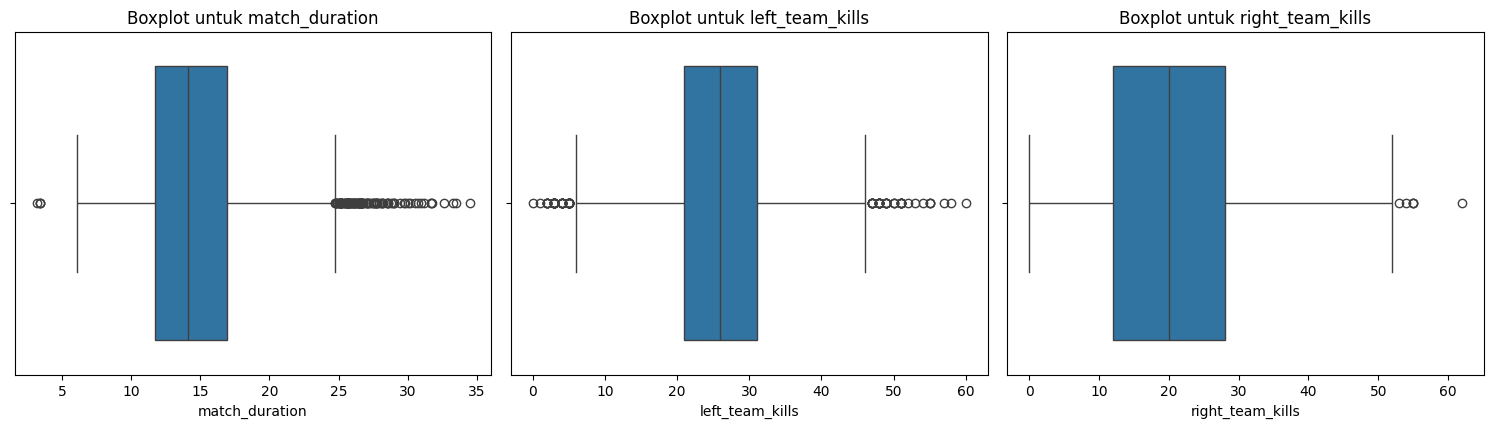

In [11]:
def display_boxplot():
  numerical_cols = df.select_dtypes(include=['number'])
  plt.figure(figsize=(20, 20))

  for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot untuk {col}")

  plt.tight_layout()
  plt.show()

display_boxplot()

IQR (Interquartile Range) adalah ukuran penyebaran data yang menunjukkan jarak antara kuartil pertama (Q1) dan kuartil ketiga (Q3), Outlier adalah nilai data yang jauh berbeda dari nilai-nilai lain dalam dataset yang bisa saja terjadi karena kesalahan pengukuran, data yang tidak biasa, atau variasi alami

In [12]:
numerical_cols = df.select_dtypes(include=['number'])

outlier_index = []
for column in numerical_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df.index[(df[column] < (Q1 - 1.5 * IQR))| (df[column] > (Q3 + 1.5 * IQR))]

    print(f"{column} : {len(outliers)}")
    outlier_index.extend(outliers)

outlier_index = sorted(set(outlier_index))
print(outlier_index)
df=df.drop(index=outlier_index)

match_duration : 119
left_team_kills : 107
right_team_kills : 6
[0, 36, 37, 67, 98, 129, 145, 147, 173, 216, 230, 264, 287, 323, 399, 412, 416, 423, 447, 472, 516, 533, 539, 543, 673, 692, 737, 746, 810, 827, 834, 836, 878, 954, 959, 1007, 1011, 1034, 1072, 1075, 1082, 1178, 1215, 1264, 1272, 1280, 1289, 1323, 1344, 1354, 1360, 1363, 1368, 1386, 1391, 1402, 1570, 1594, 1655, 1686, 1688, 1692, 1836, 1837, 1846, 1864, 1874, 1909, 1964, 1965, 2046, 2053, 2057, 2081, 2087, 2088, 2154, 2206, 2289, 2292, 2299, 2308, 2363, 2365, 2389, 2487, 2516, 2527, 2533, 2537, 2569, 2584, 2593, 2617, 2634, 2639, 2646, 2661, 2672, 2683, 2688, 2706, 2721, 2740, 2744, 2750, 2752, 2782, 2795, 2815, 2832, 2842, 2873, 2903, 2924, 2988, 2996, 2997, 3034, 3128, 3137, 3150, 3159, 3223, 3252, 3258, 3260, 3279, 3299, 3380, 3423, 3435, 3443, 3449, 3468, 3490, 3544, 3545, 3548, 3586, 3587, 3607, 3647, 3662, 3732, 3771, 3793, 3797, 3805, 3823, 3859, 3875, 3883, 3914, 3921, 3942, 3944, 3965, 3966, 4023, 4036, 4045, 4084

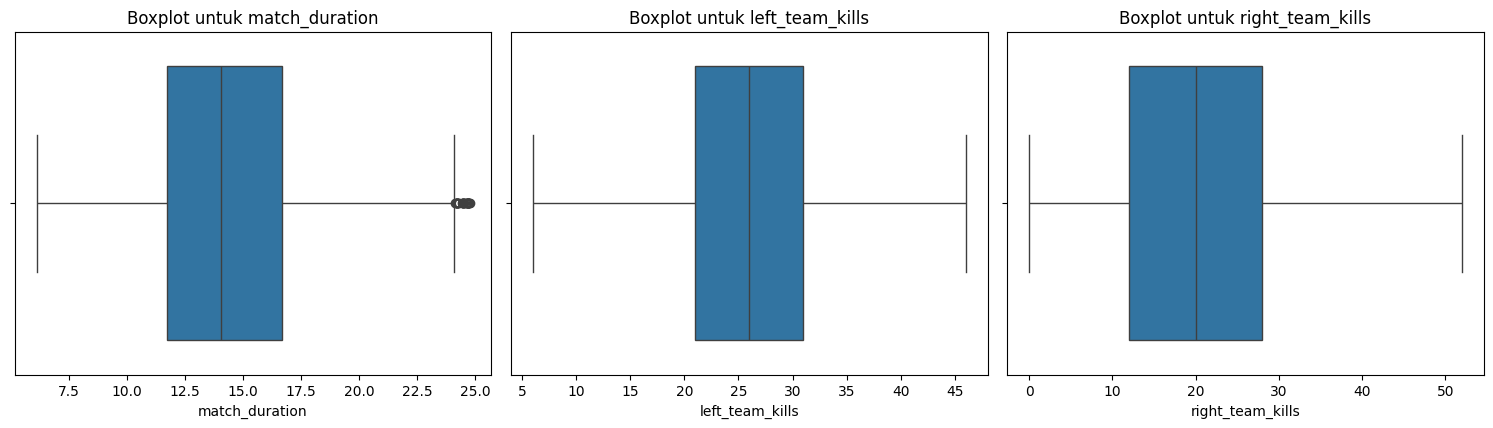

In [13]:
display_boxplot()

In [14]:
df.head()

,match_result,match_duration,left_team_kills,right_team_kills,left_heroes,right_heroes
1,Defeat,15.383333,23,22,"[Xavier, Moskov, Helcurt, Masha, Esmeralda]","[Carmilla, Lolita, Cecilion, Wanwan, Sun]"
2,Defeat,16.883333,33,26,"[Balmond, Kadita, Esmeralda, Clint, Estes]","[Fredrinn, Lesley, Silvanna, Hylos, Vexana]"
3,Victory,13.300000,33,16,"[Clint, Lunox, Esmeralda, Akai, Balmond]","[Yin, Dyrroth, Chou, Harith, Wanwan]"
4,Defeat,15.066667,27,28,"[Esmeralda, Lunox, Wanwan, Kadita, Fanny]","[Kimmy, Badang, Natalia, Angela, Roger]"
5,Defeat,13.600000,18,28,"[Bruno, Esmeralda, Nana, Rafaela, Balmond]","[Hanabi, Faramis, Valir, Freya, Julian]"


# DATA TRANSFORMATION

Data Transformation adalah proses mengubah data dari format atau struktur asli menjadi format lain yang lebih sesuai untuk analisis atau pemodelan

Encoding adalah proses mengubah data kategori (misalnya nama hero, status menang/kalah) menjadi format numerik agar bisa diproses oleh algoritma komputer, terutama machine learning.

In [15]:
# df_backup_capek_run_ulang = df
# df = df_backup_capek_run_ulang

### 📌 **Encoding Victory**

In [16]:
df['match_result'].value_counts()

,count
match_result,
Victory,3448
Defeat,1562


In [17]:
df['match_result'] = df['match_result'].map({
    'Victory':0,
    'Defeat':1
})

df['match_result'].value_counts()

,count
match_result,
0,3448
1,1562


In [18]:
df.isna().sum()

,0
match_result,0
match_duration,0
left_team_kills,0
right_team_kills,0
left_heroes,0
right_heroes,0


### 📌 **Membuat Transaction Hero Pada Masing Masing Tim**

In [19]:
from ast import literal_eval
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [20]:
df

,match_result,match_duration,left_team_kills,right_team_kills,left_heroes,right_heroes
1,1,15.383333,23,22,"[Xavier, Moskov, Helcurt, Masha, Esmeralda]","[Carmilla, Lolita, Cecilion, Wanwan, Sun]"
2,1,16.883333,33,26,"[Balmond, Kadita, Esmeralda, Clint, Estes]","[Fredrinn, Lesley, Silvanna, Hylos, Vexana]"
3,0,13.300000,33,16,"[Clint, Lunox, Esmeralda, Akai, Balmond]","[Yin, Dyrroth, Chou, Harith, Wanwan]"
4,1,15.066667,27,28,"[Esmeralda, Lunox, Wanwan, Kadita, Fanny]","[Kimmy, Badang, Natalia, Angela, Roger]"
5,1,13.600000,18,28,"[Bruno, Esmeralda, Nana, Rafaela, Balmond]","[Hanabi, Faramis, Valir, Freya, Julian]"
...,...,...,...,...,...,...
5219,1,17.716667,26,45,"[Clint, Johnson, Vexana, Saber, Benedetta]","[Guinevere, Brody, Jawhead, Khufra, Kadita]"
5220,1,12.716667,15,31,"[Kagura, Martis, Melissa, Kaja, X.Borg]","[Johnson, Kadita, Aulus, Brody, Hilda]"
5221,1,16.150000,25,27,"[Johnson, Brody, Odette, Thamuz, Gusion]","[Melissa, Dyrroth, Vexana, Aldous, Franco]"
5222,0,15.250000,30,31,"[Johnson, Odette, Martis, Sun, Miya]","[Jawhead, Terizla, Vexana, Hanzo, Natan]"


In [21]:
df_flip = df.copy()
df_flip['left_heroes'], df_flip['right_heroes'] = df['right_heroes'], df['left_heroes']
df_flip['match_result'] = 1 - df['match_result']
df_all = pd.concat([df, df_flip], ignore_index=True)

In [22]:
all_heroes = set()
for row in pd.concat([df_all['left_heroes'], df_all['right_heroes']]):
    all_heroes.update(row)
all_heroes = sorted(all_heroes)


In [23]:
# def convert_to_items(row):
#     result = []
#     result += [f"L_{h}" for h in row['left_heroes']]
#     result += [f"R_{h}" for h in row['right_heroes']]
#     result += ['WIN_L'] if row['match_result'] == 1 else ['WIN_R']
#     return result

# df_all['items'] = df_all.apply(convert_to_items, axis=1)

In [24]:
df=df.drop(columns=["left_heroes", "right_heroes" ], axis=1)

In [25]:
print(df.columns.tolist())
df
df.info()

['match_result', 'match_duration', 'left_team_kills', 'right_team_kills']
<class 'pandas.core.frame.DataFrame'>
Index: 5010 entries, 1 to 5223
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_result      5010 non-null   int64  
 1   match_duration    5010 non-null   float64
 2   left_team_kills   5010 non-null   int64  
 3   right_team_kills  5010 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 195.7 KB


# **MODELING**

In [26]:
df

,match_result,match_duration,left_team_kills,right_team_kills
1,1,15.383333,23,22
2,1,16.883333,33,26
3,0,13.300000,33,16
4,1,15.066667,27,28
5,1,13.600000,18,28
...,...,...,...,...
5219,1,17.716667,26,45
5220,1,12.716667,15,31
5221,1,16.150000,25,27
5222,0,15.250000,30,31


In [27]:
def encode_match(row):
    encoding = dict.fromkeys(['L_' + h for h in all_heroes] + ['R_' + h for h in all_heroes], 0)
    for h in row['left_heroes']:
        encoding['L_' + h] = 1
    for h in row['right_heroes']:
        encoding['R_' + h] = 1
    return pd.Series(encoding)

X = df_all.apply(encode_match, axis=1)
y = df_all['match_result']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 65.6686626746507 %
ROC AUC: 71.56508257877303 %
Cross-val Accuracy: 61.48702594810379 %


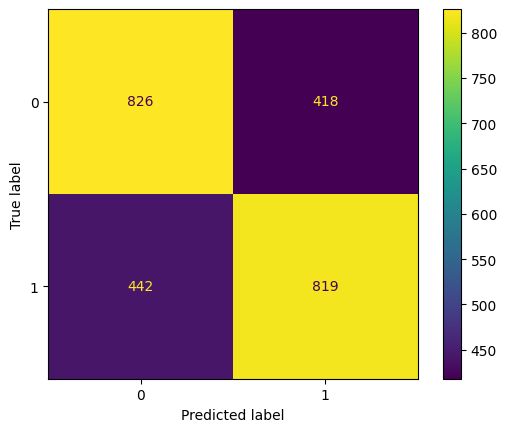

In [33]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Accuracy:", accuracy_score(y_test, y_pred)*100, "%")
print("ROC AUC:", roc_auc_score(y_test, y_prob)*100, "%")
print("Cross-val Accuracy:", scores.mean()*100, "%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [34]:

enemy_heroes = ['Valir', 'Moskov', 'Melissa']
enemy_features = ['R_' + h for h in enemy_heroes]
our_hero_pool = ['L_' + h for h in all_heroes]


from tqdm import tqdm

# Batched input
input_data = []
combos = []

for combo in combinations(our_hero_pool, 3):
    input_vec = dict.fromkeys(X.columns, 0)

    # Tambahkan hero musuh
    for h in enemy_heroes:
        h_col = 'R_' + h
        if h_col in input_vec:
            input_vec[h_col] = 1

    # Tambahkan hero kita
    for h in combo:
        if h in input_vec:
            input_vec[h] = 1

    input_data.append(input_vec)
    combos.append(tuple(h[2:] for h in combo))

# DataFrame input
input_df = pd.DataFrame(input_data)

# Prediksi seluruh kombinasi sekaligus
probs = model.predict_proba(input_df)[:, 1]

# Gabungkan hasil
recommendations = list(zip(combos, probs))
top_recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:5]

# Tampilkan hasil
print("Top hero combos vs", enemy_heroes)
for combo, prob in top_recommendations:
    print(f"{combo}: win probability = {prob:.2f}")

Top hero combos vs ['Valir', 'Moskov', 'Melissa']
('Aurora', 'Balmond', 'Eudora'): win probability = 0.90
('Aurora', 'Balmond', 'Paquito'): win probability = 0.89
('Aurora', 'Eudora', 'Paquito'): win probability = 0.89
('Aurora', 'Balmond', 'Tigreal'): win probability = 0.89
('Balmond', 'Eudora', 'Paquito'): win probability = 0.89
